▶ **Multi-layer Perceptron Classifier (MLPClassifier)**

In [120]:
from sklearn.model_selection import train_test_split, cross_val_score # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPClassifier # Biblioteca para utilização do classificador MLP
from sklearn import metrics # Biblioteca para avaliação das métricas do processamento dos modelos
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, mean_squared_error # Biblioteca para avaliação de métricas da execução do classificador
import seaborn as sns # é uma biblioteca baseada no Matplotlib, que oferece uma interface de alto nível para criação de gráficos estatísticos
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
# Montando o Google Drive na mesma conta do Google Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


▶ **Carregamento e Organização Inicial do Dataset**

In [121]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/bebidas.csv")

y = df[['d1','d2','d3']] # Inclusão da variável que estabelece a classe no vetor de saídas desejadas
df = df.drop(['d1','d2','d3'], axis=1) # Exclusão da variável que estabelece a classe das entradas
X = df

# Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

▶ **Mapa de correlação entre as variáveis do dataset**

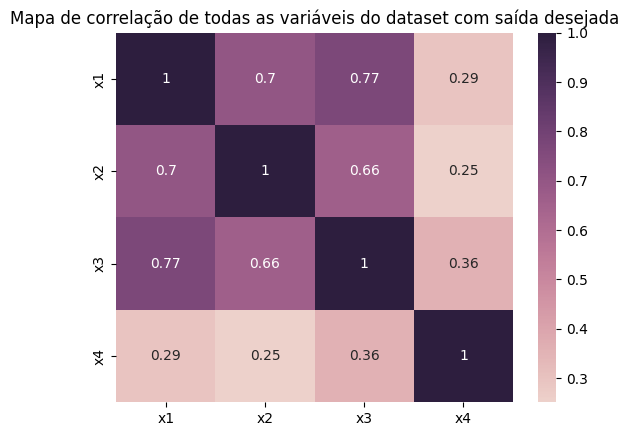

In [122]:
# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset com saída desejada')
ax=ax

▶ **Pré-Processamento dos Dados**

In [123]:
# O DATASET JÁ ESTÁ NORMALIZADO E PADRONIZADO
# Padronização de dados (https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/ - https://cursos.alura.com.br/forum/topico-sobre-o-standardscaler-184181)
#scaler = StandardScaler().fit(X_train) # Cria o modelo para o ajuste
#X_train = scaler.transform(X_train) # Aplica a padronização no dataset de treinamento baseado nos dados de treinamento
#X_test = scaler.transform(X_test) # Aplica a padronização no dataset de testes baseado nos dados de treinamento
# Observação: Importante estes passos inclusive em modo de produção no qual novos dados serão apresentados ao modelo neural e que talvez não se conheça a resposta desejada


▶ **Aplicação do MLPClassifier** (
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [124]:
mlp = MLPClassifier(solver='adam', activation='logistic', alpha=0.1, hidden_layer_sizes=(15), batch_size='auto', max_iter=5000, epsilon=1e-6)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.1, epsilon=1e-06,
              hidden_layer_sizes=15, max_iter=5000)

▶ **Avaliação do Modelo considerando um percentual fixo de amostras para treinamentos e outro para validação**

Avaliação do Modelo
Último Loss:  0.567407170415041
Número de saídas:  3
Função de ativação camada de saída:  logistic
Número de épocas do treinamento:  4698

Avaliação da Predição
Acurácia: 0.8205128205128205
MSE:  0.10256410256410257

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

      Tipo A       0.94      0.94      0.94        18
      Tipo B       0.73      0.79      0.76        14
      Tipo C       0.83      0.71      0.77         7

   micro avg       0.85      0.85      0.85        39
   macro avg       0.84      0.81      0.82        39
weighted avg       0.85      0.85      0.85        39
 samples avg       0.83      0.85      0.84        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


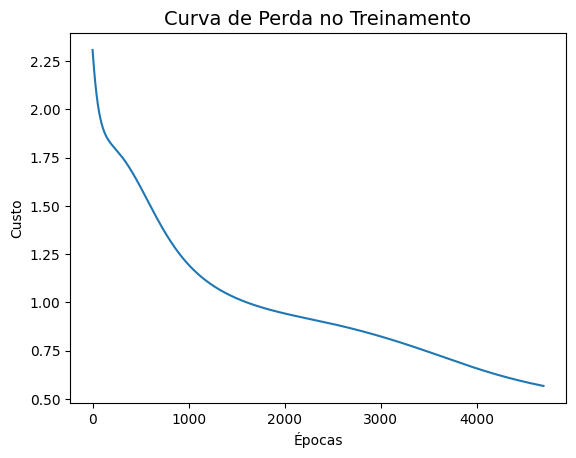

In [125]:
print("Avaliação do Modelo")
print("Último Loss: ", mlp.loss_) # loss_ fornece o último valor de perda do treinamento
print("Número de saídas: ", mlp.n_outputs_)
print("Função de ativação camada de saída: ", mlp.out_activation_)
print("Número de épocas do treinamento: ", mlp.n_iter_)
print("")

y_pred = mlp.predict(X_test)
print("Avaliação da Predição")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("")
relatorio = classification_report(y_test, y_pred, target_names=["Tipo A", "Tipo B", "Tipo C"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

# Plotando o gráfico de erros no processo de treinamento
plt.plot(mlp.loss_curve_)
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

▶ **Avaliação do modelo considerando o método de validação cruzada utilizando o conjunto completo de dados**

In [126]:
# Validação cruzada considerando o dataset completo - https://computacaointeligente.com.br/outros/intro-sklearn-part-3/
scores_cross_val = cross_val_score(mlp, X, y, cv=5)
print("Resultados da validação cruzada do conjunto completo de dados:")
print(scores_cross_val)

Resultados da validação cruzada do conjunto completo de dados:
[0.92307692 0.88461538 0.96153846 0.88461538 0.96153846]


Treinando com o conjunto completo e validação com dataset separado (Resolução do Exercício)

Avaliação do Modelo
Último Loss:  0.5402496257197371
Número de saídas:  3
Função de ativação camada de saída:  logistic
Número de épocas do treinamento:  3352

Avaliação da Predição
Acurácia: 1.0
MSE:  0.0

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

      Tipo A       1.00      1.00      1.00         6
      Tipo B       1.00      1.00      1.00         5
      Tipo C       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18
 samples avg       1.00      1.00      1.00        18



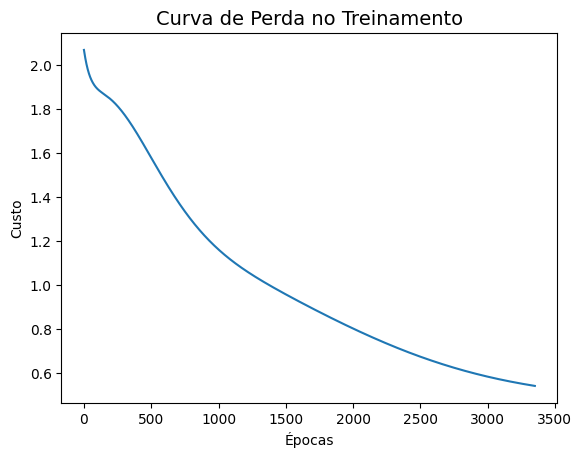

In [128]:
dfTest = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/bebidasTestes.csv")

yVal = dfTest[['d1','d2','d3']] # Inclusão da variável que estabelece a classe no vetor de saídas desejadas
dfTest = dfTest.drop(['d1','d2','d3'], axis=1) # Exclusão da variável que estabelece a classe das entradas
XVal = dfTest

mlp2 = MLPClassifier(solver='adam', activation='logistic', alpha=0.1, hidden_layer_sizes=(15), batch_size='auto', max_iter=10000, epsilon=1e-6)
mlp2.fit(X, y)

print("Avaliação do Modelo")
print("Último Loss: ", mlp2.loss_) # loss_ fornece o último valor de perda do treinamento
print("Número de saídas: ", mlp2.n_outputs_)
print("Função de ativação camada de saída: ", mlp2.out_activation_)
print("Número de épocas do treinamento: ", mlp2.n_iter_)
print("")

y_pred = mlp2.predict(XVal)
print("Avaliação da Predição")
print("Acurácia:", accuracy_score(yVal, y_pred))
print("MSE: ", mean_squared_error(yVal, y_pred))
print("")
relatorio = classification_report(yVal, y_pred, target_names=["Tipo A", "Tipo B", "Tipo C"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

# Plotando o gráfico de erros no processo de treinamento
plt.plot(mlp2.loss_curve_)
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()